In [49]:
pip install rdkit-pypi

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
%matplotlib inline

In [51]:
from rdkit import Chem
from rdkit import rdBase
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole 
from sklearn.model_selection import train_test_split

In [52]:
test_df = pd.read_csv('sol_compounds.csv')

In [53]:
test_df.shape

(1114, 2)

In [54]:
df = pd.read_csv('chemical.dataset.txt')

In [55]:
df.shape

(1144, 4)

In [56]:
df

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl
...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O


In [57]:
#converts smiles to molecules and add molecule column to dataframe
PandasTools.AddMoleculeColumnToFrame(df, 'SMILES', 'Molecule', includeFingerprints=True)
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Molecule
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf276f0>
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27760>
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf278b0>
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27a00>
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27ae0>


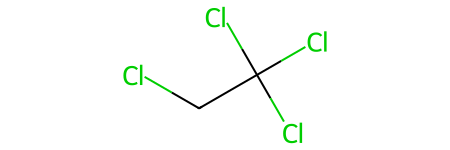

In [58]:
df['Molecule'][0]

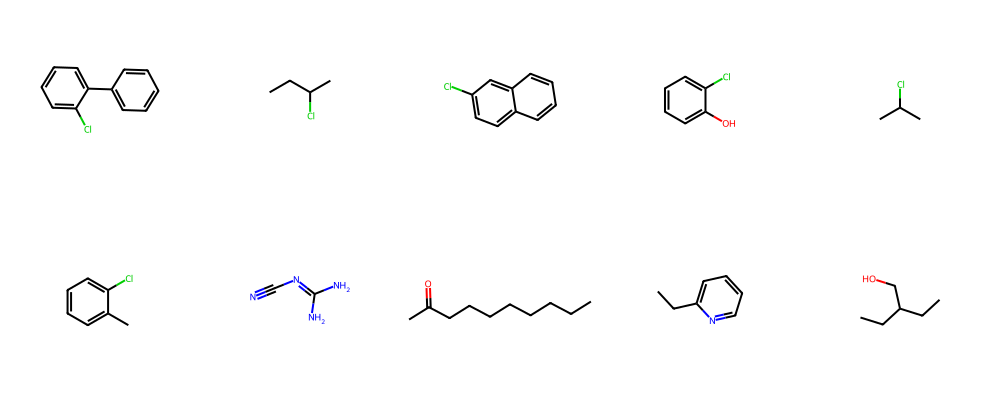

In [59]:
mols=df['Molecule'][200:210]
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200))

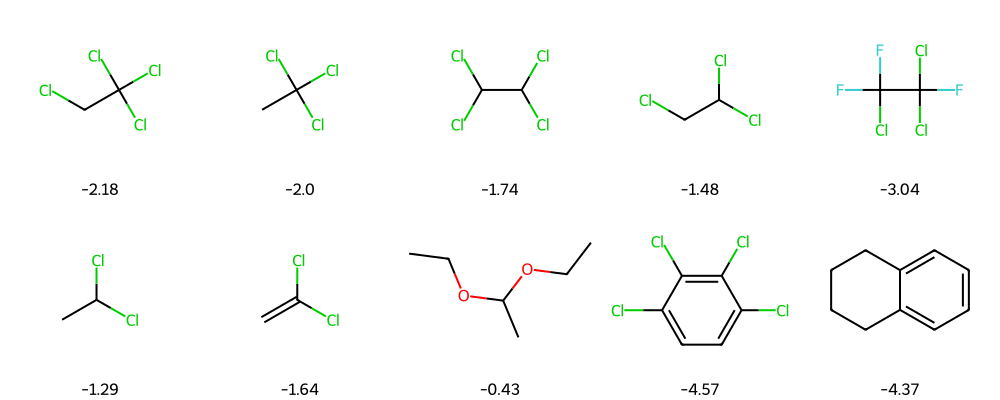

In [60]:
PandasTools.FrameToGridImage(df.head(10), column="Molecule", legendsCol="measured log(solubility:mol/L)", molsPerRow=5)

# Calculate molecular descriptors

In [61]:
df["MolWt"] = df["Molecule"].map(lambda x: Descriptors.MolWt(x))
df["LogP"] = df["Molecule"].map(lambda x: Descriptors.MolLogP(x))
df["n_RotatableBonds"] = df["Molecule"].map(lambda x: Descriptors.NumRotatableBonds(x))
df.head()

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Molecule,MolWt,LogP,n_RotatableBonds
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf276f0>,167.850,2.5954,0
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27760>,133.405,2.3765,0
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf278b0>,167.850,2.5938,1
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27a00>,133.405,2.0289,1
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27ae0>,187.375,2.9189,1


# Calculating the aromatic proportion

In [62]:
df["n_Atoms"] = df["Molecule"].map(lambda x: x.GetNumAtoms())
df["n_AromaticAtoms"] = df["Molecule"].map(lambda x: len(x.GetAromaticAtoms()))
df["AromaticProportion"] = df["n_AromaticAtoms"]/df["n_Atoms"]
df.head(5)

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Molecule,MolWt,LogP,n_RotatableBonds,n_Atoms,n_AromaticAtoms,AromaticProportion
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf276f0>,167.850,2.5954,0,6,0,0.0
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27760>,133.405,2.3765,0,5,0,0.0
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf278b0>,167.850,2.5938,1,6,0,0.0
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27a00>,133.405,2.0289,1,5,0,0.0
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl,<rdkit.Chem.rdchem.Mol object at 0x14bf27ae0>,187.375,2.9189,1,8,0,0.0


,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES,Molecule,MolWt,LogP,n_RotatableBonds,n_Atoms,n_AromaticAtoms,AromaticProportion
0,"1,1,1,2-Tetrachloroethane",-2.180,-2.794,ClCC(Cl)(Cl)Cl,,167.850,2.59540,0,6,0,0.000000
1,"1,1,1-Trichloroethane",-2.000,-2.232,CC(Cl)(Cl)Cl,,133.405,2.37650,0,5,0,0.000000
2,"1,1,2,2-Tetrachloroethane",-1.740,-2.549,ClC(Cl)C(Cl)Cl,,167.850,2.59380,1,6,0,0.000000
3,"1,1,2-Trichloroethane",-1.480,-1.961,ClCC(Cl)Cl,,133.405,2.02890,1,5,0,0.000000
4,"1,1,2-Trichlorotrifluoroethane",-3.040,-3.077,FC(F)(Cl)C(F)(Cl)Cl,,187.375,2.91890,1,8,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
1139,vamidothion,1.144,-1.446,CNC(=O)C(C)SCCSP(=O)(OC)(OC),,287.343,1.98820,8,16,0,0.000000
1140,Vinclozolin,-4.925,-4.377,CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C,,286.114,3.42130,2,18,6,0.333333
1141,Warfarin,-3.893,-3.913,CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O,,308.333,3.60960,4,23,16,0.695652
1142,Xipamide,-3.790,-3.642,Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O,,354.815,2.56214,3,23,12,0.521739

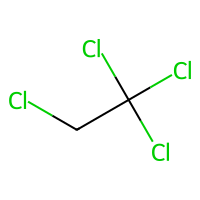
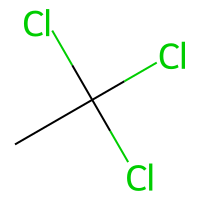
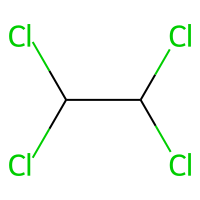
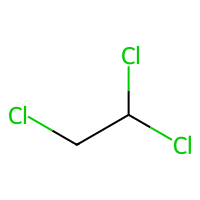
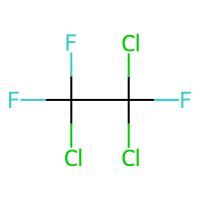
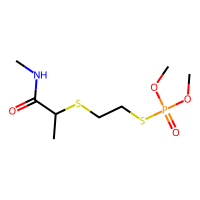
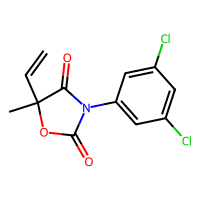
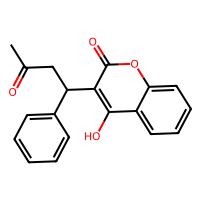
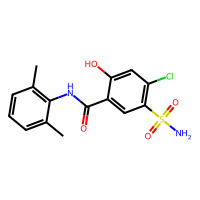
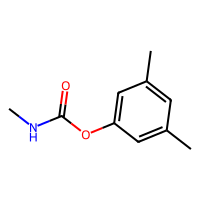

In [63]:
df

In [65]:

import os
import pickle
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import math 


# Dataset preparation

In [66]:
X = df[["MolWt", "LogP", "n_RotatableBonds", "AromaticProportion"]]

In [67]:
y = df[["measured log(solubility:mol/L)"]]

In [68]:
#Train test split

In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)

In [30]:
num_list = ["MolWt", "LogP", "n_RotatableBonds", "AromaticProportion"]

In [31]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

#combine numeric and categorical pipelines
preprocess_pipe = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_list),
       ])


In [32]:
# fit the pipelines to the training data
preprocess_pipe.fit_transform(X_train)

# apply the pipelines to the training and test data
X_train = preprocess_pipe.transform(X_train)
X_test = preprocess_pipe.transform(X_test)

In [33]:
X_train = pd.DataFrame(X_train, columns = (num_list))
X_test = pd.DataFrame(X_test, columns = (num_list))

# Dummy model

In [70]:
#Calculate the mean of `y_train`
train_mean = y_train.mean()
train_mean

measured log(solubility:mol/L)   -3.07469
dtype: float64

In [71]:
#Fit the dummy regressor on the training data
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
dumb_reg.constant_

array([[-3.07468962]])

# Linear Regression Model

In [72]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [73]:
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.7641455454083883
STD:  0.027265888321372517




In [74]:
y_pred_train = lr.predict(X_train)
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [[-0.00663091 -0.72521491  0.00502635 -0.50455953]]
Intercept: [0.25272418]
Mean squared error (MSE): 1.01
Coefficient of determination (R^2): 0.77


In [75]:
# Predict the LogS value of X_test data

In [76]:
y_pred_test = lr.predict(X_test)
print('Coefficients:', lr.coef_)
print('Intercept:', lr.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred_test))

Coefficients: [[-0.00663091 -0.72521491  0.00502635 -0.50455953]]
Intercept: [0.25272418]
Mean squared error (MSE): 1.00
Coefficient of determination (R^2): 0.77


In [77]:
# Deriving the Linear Regression Equation

In [78]:
yintercept = '%.2f' % lr.intercept_
LogP = '%.2f LogP' % lr.coef_[0][0]
MW = '%.4f MW' % lr.coef_[0][1]
RB = '%.4f RB' % lr.coef_[0][2]
AP = '%.2f AP' % lr.coef_[0][3]
print('LogS = ' + 
      ' ' + 
      yintercept + 
      ' ' + 
      LogP + 
      ' ' + 
      MW + 
      ' ' + 
      RB + 
      ' ' + 
      AP)

LogS =  0.25 -0.01 LogP -0.7252 MW 0.0050 RB -0.50 AP


In [79]:
# Scatter plot of experimental vs. predicted LogS

<function matplotlib.pyplot.show(close=None, block=None)>

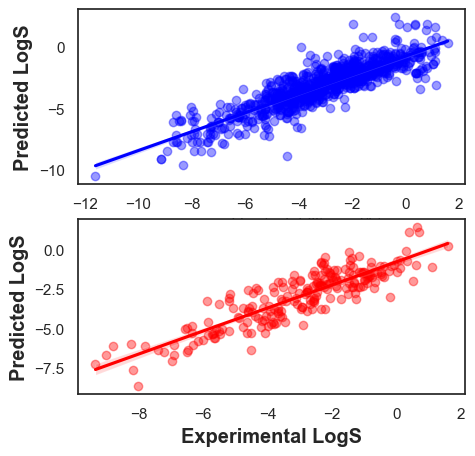

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 1)

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_train, y=y_pred_train, color='blue', scatter_kws={'alpha':0.4})
#ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted LogS', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)

# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=y_test, y=y_pred_test, color='red', scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental LogS', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted LogS', fontsize='large', fontweight='bold')
ax.figure.set_size_inches(5, 5)


plt.show